In [88]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(f"TensorFlow version: {tf.__version__}")
print(f"NumPy version: {np.__version__}")

np.set_printoptions(suppress=True)

TensorFlow version: 2.6.0
NumPy version: 1.19.5


In [89]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [90]:
# Classification labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [91]:
print(f"Train Shape: {train_images.shape}")
print(f"Test Shape: {test_images.shape}")

Train Shape: (60000, 28, 28)
Test Shape: (10000, 28, 28)


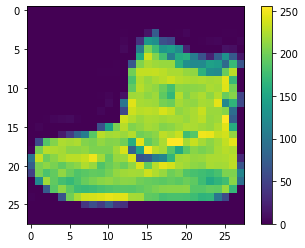

In [92]:
# Each pixel ranges from [0, 255] so let's normalize to [0, 1]
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Normalize
train_images = train_images / 255.0
test_images = test_images / 255.0

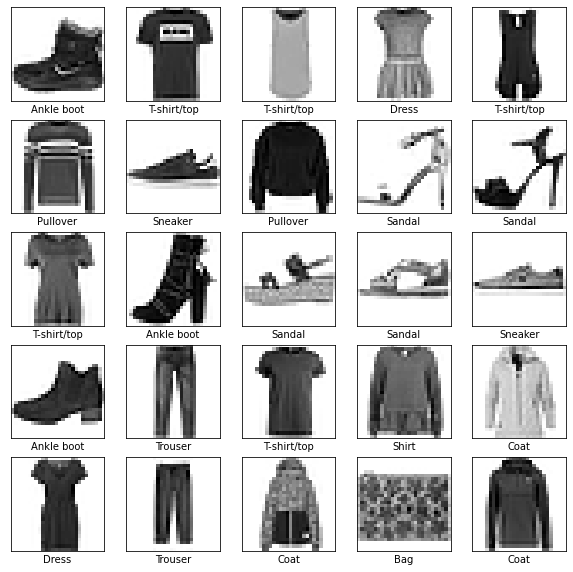

In [93]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(0)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [94]:
# model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# compilation
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])


In [95]:
# fit data
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 2s 995us/step - loss: 0.4978 - accuracy: 0.8254
Epoch 2/20
1875/1875 [==============================] - 2s 897us/step - loss: 0.3780 - accuracy: 0.8640
Epoch 3/20
1875/1875 [==============================] - 2s 823us/step - loss: 0.3395 - accuracy: 0.8770
Epoch 4/20
1875/1875 [==============================] - 2s 816us/step - loss: 0.3117 - accuracy: 0.8862
Epoch 5/20
1875/1875 [==============================] - 2s 829us/step - loss: 0.2943 - accuracy: 0.8914
Epoch 6/20
1875/1875 [==============================] - 2s 828us/step - loss: 0.2809 - accuracy: 0.8962
Epoch 7/20
1875/1875 [==============================] - 2s 848us/step - loss: 0.2686 - accuracy: 0.9003
Epoch 8/20
1875/1875 [==============================] - 2s 816us/step - loss: 0.2588 - accuracy: 0.9034
Epoch 9/20
1875/1875 [==============================] - 2s 872us/step - loss: 0.2486 - accuracy: 0.9079
Epoch 10/20
1875/1875 [==============================] - 2s 847u

In [96]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest accuracy: {test_acc}")

313/313 [==============================] - 0s 611us/step - loss: 0.3501 - accuracy: 0.8881

Test accuracy: 0.8881000280380249


Probs: [0.00016691 0.         0.99972373 0.         0.00005632 0.
 0.00005309 0.         0.         0.        ]
Prediction: Pullover


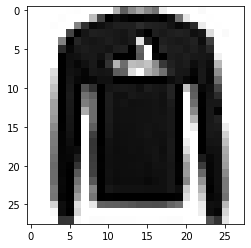

In [98]:
prob_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

j = np.random.randint(low=0, high=999)
predictions = prob_model.predict(test_images)
print(f"Probs: {predictions[j]}")
print(f"Prediction: {class_names[np.argmax(predictions[j])]}")
plt.imshow(test_images[j], cmap=plt.cm.binary)

In [99]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(
        class_names[predicted_label],
        100*np.max(predictions_array),
        class_names[true_label]),
        color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

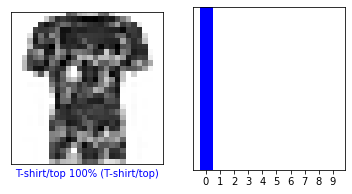

In [122]:
i = np.random.randint(0, 999)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

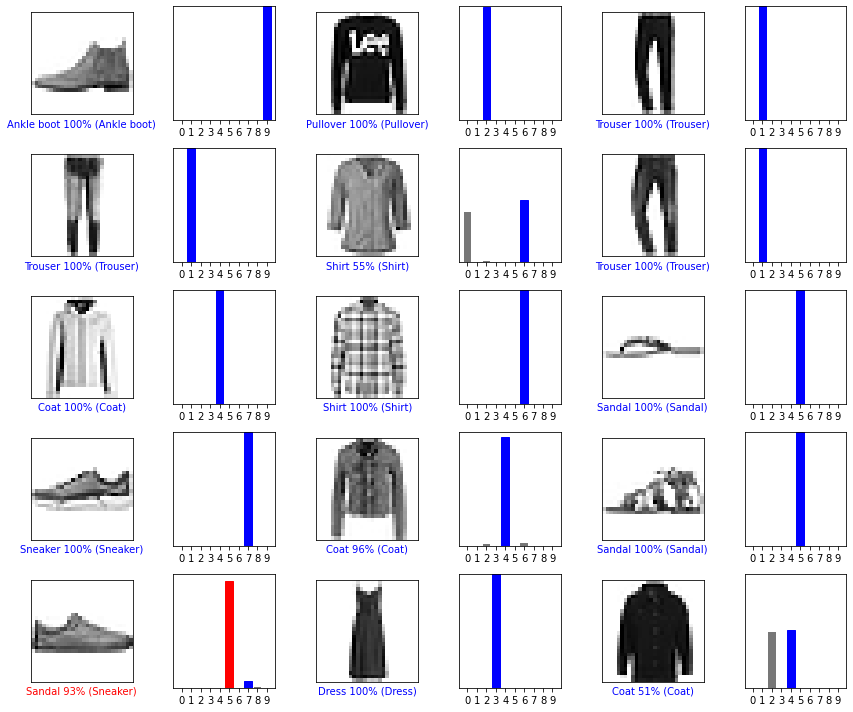

In [123]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [128]:
img = test_images[1]
print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(28, 28)
(1, 28, 28)


[[0.00000738 0.         0.9989549  0.         0.00069815 0.
  0.00033948 0.         0.         0.        ]]


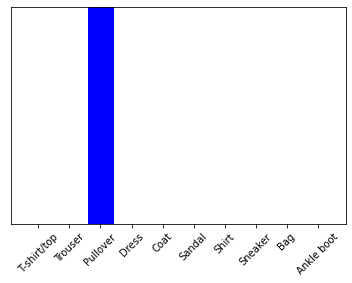

2


In [132]:
# Model.predict() returns a list of lists for each img in batch
predictions_single = prob_model.predict(img)
print(predictions_single)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

print(np.argmax(predictions_single[0]))
